In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from string import punctuation
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score


# Loading Data

In [ ]:
df_customer = pd.read_csv("https://drive.google.com/u/0/uc?id=1VKwkHPC3w6xFndHWXgnPRmYlr8bflqTe&export=download")

# Exploratory Data Analysis

In [ ]:
df_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_customer.shape

(7043, 21)

1. customerID: معرف فريد للعميل.
2. gender: نوع جنس العميل.
3. SeniorCitizen: ما إذا كان العميل مواطنًا كبيرًا في السن.
4. Partner: ما إذا كان للعميل شريك.
5. Dependents: ما إذا كان للعميل أي أفراد من الأسرة يعتمدون عليه.
6. tenure: عدد أشهر أن العميل عميل لدى الشركة.
7. PhoneService: ما إذا كان للعميل خدمة هاتفية.
8. InternetService: ما إذا كان للعميل خدمة إنترنت.
9. OnlineSecurity: ما إذا كان للعميل خدمة أمان عبر الإنترنت.
10. OnlineBackup: ما إذا كان للعميل خدمة نسخ احتياطي عبر الإنترنت.
11. DeviceProtection: ما إذا كان للعميل خدمة حماية الجهاز.
12. TechSupport: ما إذا كان للعميل خدمة دعم فني.
13. StreamingTV: ما إذا كان للعميل خدمة تلفزيون بث.
14. StreamingMovies: ما إذا كان للعميل خدمة أفلام بث.
15. PaperlessBilling: ما إذا كان للعميل فواتير ورقية.
16. PaymentMethod: طريقة الدفع للعميل.
17. MonthlyCharges: رسوم العملاء الشهرية.
18. TotalCharges: رسوم العملاء الإجمالية.
19. Churn: ما إذا كان العميل قد غادر الشركة.
20. Contract: نوع عقد العميل.
21. MultipleLines: ما إذا كان لدى العميل خطين أو أكثر.

# Questions

**Q2:** How many customers have dependents?

In [ ]:
dependents_num = df_customer.Dependents.value_counts()
print(dependents_num['Yes'])

2110


**Q3 :** Are there any missing values?

In [ ]:
missing_values = df_customer.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**Q4 :** What are the data types of each columns?

In [ ]:
print(df_customer.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


**Q5 :** How many customers are there with a tenure of less than or equal to 12 months?

In [ ]:
print('Number of customers with a tenure of less than or equal to 12 months:', df_customer.loc[df_customer['tenure'] <= 12].shape[0])

Number of customers with a tenure of less than or equal to 12 months: 2186


**Q6:** What is the highest total customer charge?

In [ ]:
print('Maximum value in the TotalCharges column:', df_customer['TotalCharges'].max())

Maximum value in the TotalCharges column: 999.9


**Q7:** Is there a correlation between the amount a customer pays and their likelihood to stay with the company?

In [ ]:
#correlation = df_customer['TotalCharges'].corr(df_customer['Churn'])
#print('Correlation between TotalCharges and Churn:', correlation)

**Q9:** What is the average monthly charge for customers who churned versus those who did not churn?

In [ ]:
# Calculate the average monthly charge for customers who did and did not churn
avg_monthly_charges = df_customer.groupby('Churn')['MonthlyCharges'].mean()

print('Average monthly charge for customers who did not churn: $', round(avg_monthly_charges['No'], 2))
print('Average monthly charge for customers who churned: $', round(avg_monthly_charges['Yes'], 2))

Average monthly charge for customers who did not churn: $ 61.27
Average monthly charge for customers who churned: $ 74.44


**Q10 :** Is there any correlation between tenure and churn rate? علاقة بين ترك العميل للشركة وعدد الاشهر  المشترك بالخدمة

In [ ]:
# df_customer['tenure'].corr(df_customer['Churn'])

-0.352228670113078 This indicates that as the tenure of a customer increases, the likelihood of them churning decreases.


# Data Cleaning & Processing

In [ ]:
# Check for missing values again
print("Number of missing values in each column:")
print(df_customer.isnull().sum())

Number of missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df_copy = df_customer.copy()

In [ ]:
# Convert categorical variables to numerical representations
mapping_MultipleLines = {'No phone service': 0, 'No': 1, 'Yes': 2}
mapping_InternetService = {'DSL': 0, 'No': 1, 'Fiber optic': 2}
mapping_OnlineSecurity = {'No': 0, 'Yes': 1, 'No internet service': 2}
mapping_OnlineBackup = {'No': 0, 'Yes': 1, 'No internet service': 2}
mapping_DeviceProtection = {'No': 0, 'Yes': 1, 'No internet service': 2}
mapping_TechSupport = {'No': 0, 'Yes': 1, 'No internet service': 2}
mapping_StreamingTV = {'No': 0, 'Yes': 1, 'No internet service': 2}
mapping_StreamingMovies = {'No': 0, 'Yes': 1, 'No internet service': 2}
mapping_Contract = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
mapping_PaymentMethod = {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2,'Credit card (automatic)':3}



df_copy['MultipleLines'] = df_copy['MultipleLines'].map(mapping_MultipleLines)
df_copy['InternetService'] = df_copy['InternetService'].map(mapping_InternetService)
df_copy['OnlineSecurity'] = df_copy['OnlineSecurity'].map(mapping_OnlineSecurity)
df_copy['OnlineBackup'] = df_copy['OnlineBackup'].map(mapping_OnlineBackup)
df_copy['DeviceProtection'] = df_copy['DeviceProtection'].map(mapping_DeviceProtection)
df_copy['TechSupport'] = df_copy['TechSupport'].map(mapping_TechSupport)
df_copy['StreamingTV'] = df_copy['StreamingTV'].map(mapping_StreamingTV)
df_copy['StreamingMovies'] = df_copy['StreamingMovies'].map(mapping_StreamingMovies)
df_copy['Contract'] = df_copy['Contract'].map(mapping_Contract)
df_copy['PaymentMethod'] = df_copy['PaymentMethod'].map(mapping_PaymentMethod)

categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling', "Churn"]
df_encoded = pd.get_dummies(df_copy, columns=categorical_columns, drop_first=True)

df_encoded.head(3)

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes
0,7590-VHVEG,0,1,0,0,0,1,0,0,0,...,0,0,29.85,29.85,0,1,0,0,1,0
1,5575-GNVDE,0,34,1,0,1,0,1,0,0,...,1,1,56.95,1889.5,1,0,0,1,0,0
2,3668-QPYBK,0,2,1,0,1,1,0,0,0,...,0,1,53.85,108.15,1,0,0,1,1,1


In [ ]:
# Define the target variable ('Churn') and feature set (all other columns except 'Churn' and 'customerID')
X = df_encoded.drop(columns=['customerID', 'Churn_Yes'])
y = df_encoded['Churn_Yes']

In [ ]:
# Replace non-numeric values in 'TotalCharges' with NaN
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')

# Impute missing values in 'TotalCharges' with the mean
X['TotalCharges'].fillna(X['TotalCharges'].mean(), inplace=True)

# Now, proceed with Min-Max scaling
scaler = MinMaxScaler()
X[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X[['MonthlyCharges', 'TotalCharges']])

# Visualization

**Q1:** What is the distribution of contract types among customers who churned? عقود العملاء الذين تخلوا عن الشركة

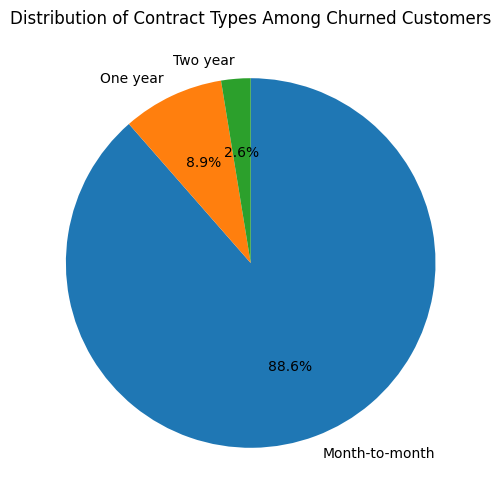

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Count the number of customers who churned for each contract type
churn_contracts = df_customer[df_customer['Churn'] == 'Yes']['Contract'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(churn_contracts.values, labels=churn_contracts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribution of Contract Types Among Churned Customers')
plt.show()

plt

**Q2 :** what is the effect of the average monthly payment?

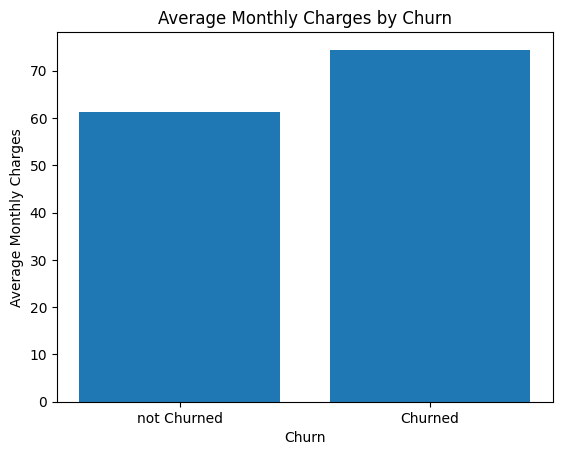

In [ ]:
# Compute the average monthly charge for customers who did not churn and for customers who churned
avg_monthly_charges = df_customer.groupby('Churn')['MonthlyCharges'].mean()

# Create a bar chart of the average monthly charges
plt.bar(['not Churned', 'Churned'], avg_monthly_charges)
plt.xlabel('Churn')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Churn')
plt.show()

Gender distribution:
Male      3555
Female    3488
Name: gender, dtype: int64


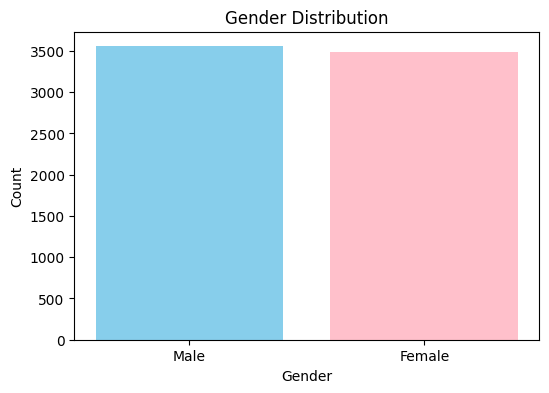

In [ ]:
# Assuming you have a DataFrame called 'df' with a 'gender' column

# Calculate gender counts
gender_counts = df_customer['gender'].value_counts()

# Print gender distribution
print("Gender distribution:")
print(gender_counts)

# Visualization: Bar plot for gender distribution
plt.figure(figsize=(6, 4))

# Specify colors for each gender category
colors = ['skyblue', 'pink']

# Plot the bar chart using the specified colors
plt.bar(gender_counts.index, gender_counts.values, color=colors)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()
print("\n\n")

Senior Citizen distribution:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


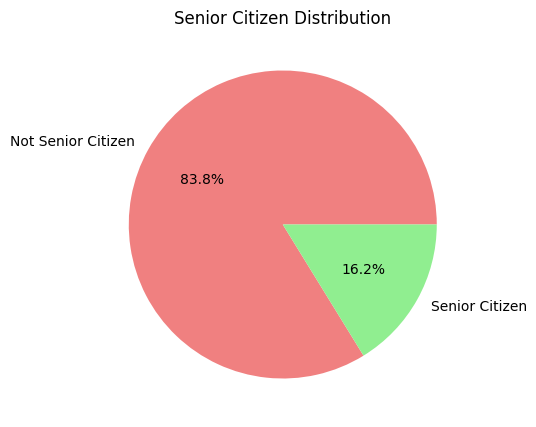

In [ ]:
senior_citizen_counts = df_customer['SeniorCitizen'].value_counts()
print("Senior Citizen distribution:")
print(senior_citizen_counts)

# Visualization: Pie chart for Senior Citizen distribution
plt.figure(figsize=(5, 5))
plt.pie(senior_citizen_counts, labels=['Not Senior Citizen', 'Senior Citizen'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title("Senior Citizen Distribution")
plt.show()
print("\n\n")

In [ ]:
df_encoded.head()

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes
0,7590-VHVEG,0,1,0,0,0,1,0,0,0,...,0,0,29.85,29.85,0,1,0,0,1,0
1,5575-GNVDE,0,34,1,0,1,0,1,0,0,...,1,1,56.95,1889.5,1,0,0,1,0,0
2,3668-QPYBK,0,2,1,0,1,1,0,0,0,...,0,1,53.85,108.15,1,0,0,1,1,1
3,7795-CFOCW,0,45,0,0,1,0,1,1,0,...,1,2,42.30,1840.75,1,0,0,0,0,0
4,9237-HQITU,0,2,1,2,0,0,0,0,0,...,0,0,70.70,151.65,0,0,0,1,1,1


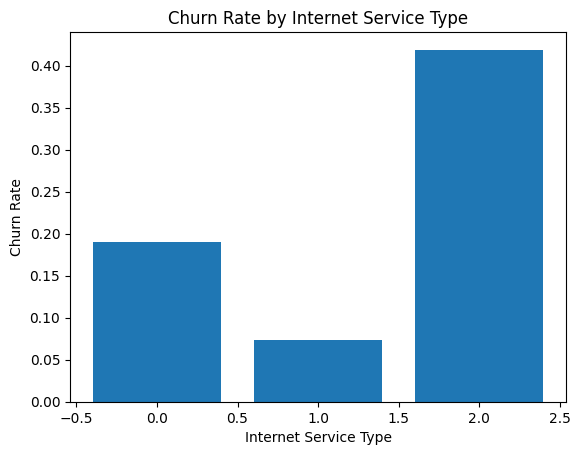

In [ ]:
# Calculate the churn rate by internet service type
churn_rate = df_encoded.groupby('InternetService')['Churn_Yes'].mean()

# Create a bar chart of the churn rate by internet service type
plt.bar(churn_rate.index, churn_rate.values)
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Internet Service Type')
plt.show()

In [ ]:
df_encoded.head()

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes
0,7590-VHVEG,0,1,0,0,0,1,0,0,0,...,0,0,29.85,29.85,0,1,0,0,1,0
1,5575-GNVDE,0,34,1,0,1,0,1,0,0,...,1,1,56.95,1889.5,1,0,0,1,0,0
2,3668-QPYBK,0,2,1,0,1,1,0,0,0,...,0,1,53.85,108.15,1,0,0,1,1,1
3,7795-CFOCW,0,45,0,0,1,0,1,1,0,...,1,2,42.30,1840.75,1,0,0,0,0,0
4,9237-HQITU,0,2,1,2,0,0,0,0,0,...,0,0,70.70,151.65,0,0,0,1,1,1


In [ ]:
# # Define the colors for each internet service type
# # colors = {'0': '#1f77b4',
# #           '1': '#ff7f0e',
# #           '2': '#2ca02c'}

# # Calculate the churn rate by internet service type
# churn_rate = df_customer.groupby('InternetService')['Churn'].mean()

# # Create a bar chart of the churn rate by internet service type
# fig, ax = plt.subplots()
# ax.bar(churn_rate.index, churn_rate.values)
# ax.set_xlabel('Internet Service Type')
# ax.set_ylabel('Churn Rate')
# ax.set_title('Churn Rate by Internet Service Type')
# plt.show()

# Feature Engineering

In [ ]:
services = ['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'MultipleLines',
            'OnlineBackup', 'OnlineSecurity', 'InternetYesNo', 'PhoneService']

df_customer['TotalServices'] = df_customer[services].sum(axis=1)


# ML MODEL

In [ ]:
# Replace non-numeric values in 'TotalCharges' with NaN
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')

# Impute missing values in 'TotalCharges' with the mean
X['TotalCharges'].fillna(X['TotalCharges'].mean(), inplace=True)

# Now, proceed with Min-Max scaling
scaler = MinMaxScaler()
X[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X[['MonthlyCharges', 'TotalCharges']])


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers to compare
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier()
]

# Dictionary to store model accuracies
model_accuracies = {}

# Train, predict, and evaluate each classifier
for classifier in classifiers:
    model_name = classifier.__class__.__name__
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

# Display the accuracy of each model
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name} accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression accuracy: 0.8176
DecisionTreeClassifier accuracy: 0.7246
RandomForestClassifier accuracy: 0.7935
SVC accuracy: 0.7949
KNeighborsClassifier accuracy: 0.7551
GaussianNB accuracy: 0.7175
AdaBoostClassifier accuracy: 0.8176
GradientBoostingClassifier accuracy: 0.8119
XGBClassifier accuracy: 0.7984
LGBMClassifier accuracy: 0.8041
